In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

# Solucion de los problema propuestos

## Primer punto

- Hallar la solución de la ecuacion $h(x)= e ^{x}-2-\cos({e^{x}-2)}$ [1], igualamos la función f(x) = 0.

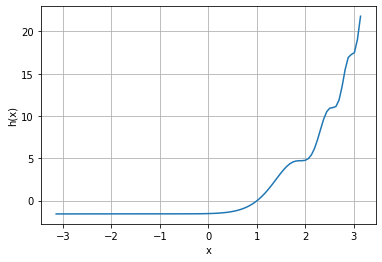

In [2]:
h = lambda x: np.exp(x)-np.cos(np.exp(x)-2)-2 #Definimos la función lamda
x = np.linspace(-np.pi,np.pi,100)
plt.plot(x,h(x))
plt.grid()
plt.xlabel("x")
plt.ylabel("h(x)")
plt.show()

In [3]:
# Metodod de bisección
op = optimize.bisect(h,a=0,b=1.5,xtol=1E-6)
print("Metodo de la biseccion =",op)

Metodo de la biseccion = 1.0076243877410889


In [4]:
#Metodo del punto fijo
e = lambda x: x - h(x)
p = optimize.fixed_point(e,1)
print("Metodo de punto fijo =",p)

Metodo de punto fijo = 1.0076239716581368


In [5]:
#Metodo de la secante
s = optimize.newton(h,1)
print("Metodo de la secante =", s)

Metodo de la secante = 1.007623971658137


In [6]:
#Metodo de Newton-Rapshon
h_prima = lambda x : np.exp(x)+np.sin(np.exp(x)-2)*np.exp(x)
n = optimize.newton(h,1,h_prima)
print("Metodo de Newton-Rapshon =",n)

Metodo de Newton-Rapshon = 1.0076239716581368


# Segundo punto

- Solucion de la ecuacion  $x(t) = - \frac {g}{2{\omega^2}}(\frac {e^{\omega t}- e^{- \omega t}}{2}) - sin \ \omega t$  [2]

Del enunciado nos dice que cuando ha pasado un instante de 1s la particula se ha desplazado 0.51m, reemplazando en la ecuación [2] se obtiene el valor de $\omega$  

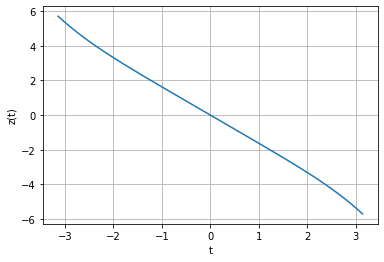

In [7]:
g = 9.76 #m/s²
w = np.linspace(-np.pi,np.pi,100)
z = lambda w : -(g/(2*(w)**2))*(np.sinh(w)-np.sin(w))
plt.plot(w,z(w))
plt.xlabel("t")
plt.ylabel("z(t)")
plt.grid()

In [8]:
#Metodo de biseccion
p = optimize.bisect(z,a=-0.5,b=0.2)
print("Metodo de bisección =",p)

Metodo de bisección = 1.1920928923357466e-08


In [9]:
#Metodo de secante
s = optimize.newton(z,0.5)
print("Metodo de la secante =",s)

Metodo de la secante = 1.1092782057237545e-08


In [10]:
#Metodo de punto fijo
h = lambda w : w-z(w)
m = optimize.fixed_point(h,0.5)
print("Metodo de punto fijo =",m)

Metodo de punto fijo = 1.8187708283878834e-14


In [11]:
# Metodo de Newton-rapshon
z_pr = lambda w: -(g/2*w)*(np.cosh(w)-np.cos(w))

# Tercer punto

$ V = L(0.5 \pi r^2 - r^2 \arcsin{\frac{h}{r}}- h(r^2 - h^2)^{\frac{1}{2}}))$

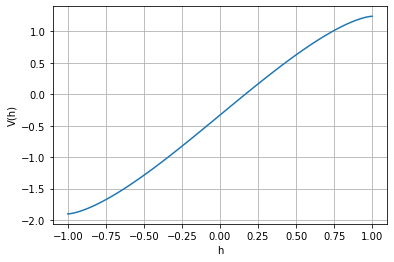

In [12]:
L = 10 #Pies
r = 1  # Pies
V_0 = 12.4 #Pies cubicos
V = lambda h: (V_0)/L - 0.5*np.pi*(r**2)+(r**2)*np.arcsin(h/r)+h*(r**2-h**2)**(1/2)
h = np.linspace(-1,1,100)
plt.plot(h,V(h))
plt.grid()
plt.xlabel("h")
plt.ylabel("V(h)")
plt.show()

In [13]:
#Metodo de biseccion
u = optimize.bisect(V,a=-1,b=1)
print("Metodo de bisección",u)

Metodo de bisección 0.1661660346599092


In [14]:
#Metodo de la secante
i = optimize.newton(V,0)
print("Metodo de la secante =",i)

Metodo de la secante = 0.16616603465836785


In [15]:
#Metodo de punto fijo
w = lambda h: h -V(h)
q = optimize.fixed_point(w,0)
print("Metodo del punto fijo =",q)

Metodo del punto fijo = 0.16616603465836816


In [16]:
#Metodo de Newton-Rapshon
V_pri =lambda h: ((r**2)/np.sqrt(1-(h/r)**2))+ np.sqrt(r**2-h**2) - (h**2/r)*(1/(np.sqrt(1-(h/r)**2)))
d = optimize.newton(V,0,V_pri)
print("Metodo de Newton-Rapshon =",d)

Metodo de Newton-Rapshon = 0.16616603465836816


La profundidad del agua cuando la longitud es de 10 pies, el radio de 1 pie y el volumen es de 12.4 es de 0.166 pies de profundidad 

# Cuarto punto

Ecuacion necesaria para resolver el siguiente problema es: 
$ A \sin{\alpha} \cos{\alpha} + B \sin^2{\alpha}- C \cos{\alpha} - E \sin{\alpha}$

donde 
$A = l\sin{\beta}$ $\space B = l \cos{\beta}$

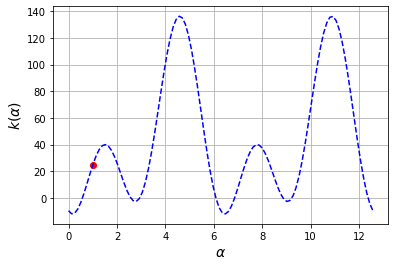

In [17]:
l = 89 #Pulgadas
h = 49 #Pulgadas
D = 55 #Pulgadas
β = 11.5 #Grados
β = np.deg2rad(β)
A = l*np.sin(β)
B = l*np.cos(β)
C = (h + 0.5*D)*np.sin(β)-0.5*D*np.tan(β)
E = (h + 0.5*D)*np.cos(β)-0.5*D
k = lambda α: A*np.sin(α)*np.cos(α) + B*(np.power(np.sin(α),2))-C*np.cos(α)-E*np.sin(α)
α_1 = np.linspace(0,4*np.pi,100)
plt.plot(α_1,k(α_1),"--b")
plt.scatter(r,k(r), color="red")
plt.grid()
plt.xlabel(r"$\alpha$", fontsize = 14)
plt.ylabel(r"$k(\alpha)$", fontsize = 14)
plt.show()

In [18]:
# Metodo de biseccion
s = optimize.bisect(k,a=0,b=2)
root = np.rad2deg(s)
print(f"El algulo es de {root:.3} grados")

El algulo es de 33.0 grados


In [19]:
#Metodo de punto fijo
j = lambda α : α - k(α)
s = optimize.fixed_point(j,0.2)
rot_2 = np.rad2deg(s)
print(f"Con este algoritmo me dieron valores que no er")

Con este algoritmo me dieron valores que no er


In [20]:
#Metodo de la secante
sec = optimize.newton(k,1)
root_2 = np.rad2deg(sec)
print(f"El angulo es de {root_2:.3} grados")

El angulo es de 33.0 grados


In [21]:
#Metodo de Newton-Rapshon
k_prima = lambda α: A*(2*np.cos(α)-1) + B*np.sin(2*α) + C*np.sin(α)-E*np.cos(α)
r = optimize.newton(k,1,k_prima)
rot_2 = np.rad2deg(r)
print(f"El angulo es de {rot_2:.3} grados")

El angulo es de 33.0 grados


# Quinto punto

a) Para hallar el area de un segmento circular cuya area sea igual a un cuerto del area del circulo se procede a hacer un esquema y así encontrar la ecuación trascental.

- Primero hallamos el area del triangulo que forma la cuerda con los radios de la circunferencia. Obteniendo así la ecuación: $A_{T} = r^2 \cos{\frac{\theta}{2}}\sin{\frac{\theta}{2}}$. Luego de obtener la ecuación que corresponde al area del triangulo, se halla la ecuacion que corresponde al area que forma el angulo $\theta$, esto teniendo en cuenta que el area total del circulo corresponde a $2\pi$ y se encuentra que para un angulo $\theta$, el area corresponde a $A_{s} = \frac{r^2 \theta}{2}$.
Finalmente el area del segmento es la resta del area formada por el angulo $\theta$ y el area del triangulo e igualando a un cuarto del area del circulo, se halla la siguiente expreción que corresponde a la ecuación trascendental.

1. $\theta - \sin{\theta} = \frac{\pi}{2}$

b) Definamos la funcion $f(\theta) = \theta - \sin{\theta}-\frac{\pi}{2}$

In [22]:
L = lambda theta: theta-np.sin(theta)-np.pi/2
x = np.linspace(-2*np.pi,2*np.pi,1000)

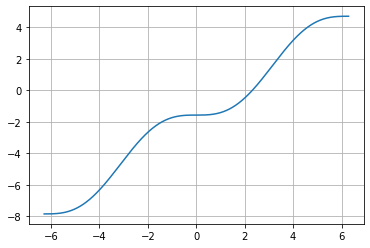

In [23]:
# Punto c,d,f
dicc = {"theta":x,"f(theta)":L(x)}
df = pd.DataFrame(dicc)
plt.plot(df["theta"],df["f(theta)"])
plt.grid()
plt.show()

El intervalo en que se encuentra la raiz de la ecuacion trascendental es en el abierto [2,3].

Para hallar el valor cuando la funcion $f(\theta)=0$ se utilizará el algoritmo de la bisección.

# Algoritmo de la bisección

### Valor del angulo con los metodos de Bisección, Newton-Rapshon, Secante, Punto fijo

### Metodo de biseccion

In [28]:
w = optimize.bisect(L,a=2,b=3,xtol=1E-6)
root = np.rad2deg(w)
print("Metodo de biseccion = ",w)
print(f"El angulo por el metodo de la biseccion es --> {root}")

Metodo de biseccion =  2.309882164001465
El angulo por el metodo de la biseccion es --> 132.3464991698294


### Algoritmo de Newton-Rapshon

In [29]:
L_prima = lambda theta: 1-np.cos(theta)
met_New = optimize.newton(L,2,L_prima)
root1 = np.rad2deg(met_New)
print("Metodo de Newton =",met_New)
print(f"El angulo por el metodo de Newton es --> {root1}")

Metodo de Newton = 2.3098814600100575
El angulo por el metodo de Newton es --> 132.34645883409294


### Metodo de la secante

In [34]:
met_sec = optimize.newton(L,2)
print("Metodo de la secante =",met_sec)
root2 = np.rad2deg(met_sec)
print(f"El angulo por el metodo de la secante es --> {root2}")

Metodo de la secante = 2.309881460010033
El angulo por el metodo de la secante es --> 132.34645883409152


### Metodo del punto fijo

In [35]:
g = lambda theta: theta - L(theta)
met_punto = optimize.fixed_point(g,2)
root3 = np.rad2deg(met_punto)
print("Metodo de punto fijo =",met_punto)
print(f"El angulo por el metodo de punto fijo es --> {root3}")

Metodo de punto fijo = 2.3098814600100575
El angulo por el metodo de punto fijo es --> 132.34645883409294
